In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MLpratica01/cloud.csv')
print(df)

     period  seeded  season    NC    SC   NWC  Target
0       1.0       1    -0.5  1.65  1.80  3.33    1.69
1       2.0       0    -0.5  1.09  0.79  1.59    0.74
2       3.0       1    -1.0  2.39  0.36  2.06    0.81
3       4.0       0    -1.0  2.96  1.27  4.05    1.44
4       5.0       1    -1.0  4.16  2.16  6.00    2.48
..      ...     ...     ...   ...   ...   ...     ...
103   190.0       0     0.5  1.38  1.86  2.91    1.36
104   191.0       1     0.5  1.22  2.28  1.58    1.17
105   192.0       0     0.5  2.46  2.47  2.39    2.37
106   193.0       1     0.5  0.05  0.02  0.09    0.02
107   194.0       0     0.5  0.61  0.87  1.35    0.92

[108 rows x 7 columns]


**Run the 5-folds CV 10 times using different values for random_state and calculate the average R2 of these runs for the Linear Regression algorithm.**

Text(0.5, 1.0, 'Correlation between variables')

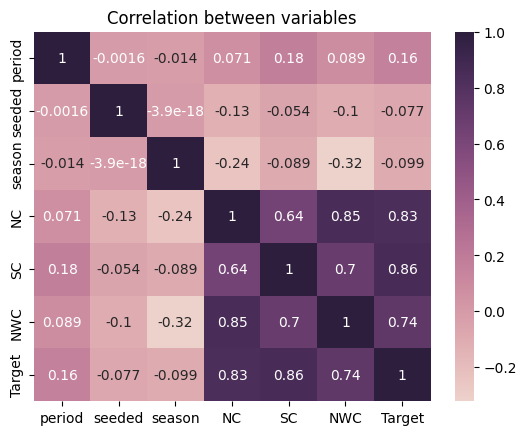

In [53]:
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Correlation between variables')

In [54]:
x = df.drop('Target', axis = 1)
y = df['Target']

print(x)
print(y)

     period  seeded  season    NC    SC   NWC
0       1.0       1    -0.5  1.65  1.80  3.33
1       2.0       0    -0.5  1.09  0.79  1.59
2       3.0       1    -1.0  2.39  0.36  2.06
3       4.0       0    -1.0  2.96  1.27  4.05
4       5.0       1    -1.0  4.16  2.16  6.00
..      ...     ...     ...   ...   ...   ...
103   190.0       0     0.5  1.38  1.86  2.91
104   191.0       1     0.5  1.22  2.28  1.58
105   192.0       0     0.5  2.46  2.47  2.39
106   193.0       1     0.5  0.05  0.02  0.09
107   194.0       0     0.5  0.61  0.87  1.35

[108 rows x 6 columns]
0      1.69
1      0.74
2      0.81
3      1.44
4      2.48
       ... 
103    1.36
104    1.17
105    2.37
106    0.02
107    0.92
Name: Target, Length: 108, dtype: float64


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
      ('regressor', LinearRegression())
])

# Create a copy of x and y for cross-validation to avoid modifying original
x_cv = x.copy()
y_cv = y.copy()

n_run = 10
r2_means = []

for i in range(n_run):
  random_state = i + 1

  kf = KFold(n_splits=5, shuffle=True, random_state = random_state)

  error_scores = []

  for train_index, test_index in kf.split(x_cv): # Use the copy here
    x_train_cv, x_test_cv = x_cv.iloc[train_index], x_cv.iloc[test_index] # Use different variable names
    y_train_cv, y_test_cv = y_cv.iloc[train_index], y_cv.iloc[test_index] # Use different variable names

    pipeline.fit(x_train_cv, y_train_cv) # Fit on the cv data
    y_pred_cv = pipeline.predict(x_test_cv) # Predict on the cv data
    r2 = r2_score(y_test_cv, y_pred_cv) # Evaluate on the cv data
    error_scores.append(r2)

  r2_mean = np.mean(error_scores)
  r2_means.append(r2_mean)

final_mean = np.mean(r2_means)

print(f'Average MSE over the 10 executions with 5 folds: {final_mean:.4f}')

Average MSE over the 10 executions with 5 folds: 0.8209


In [56]:
# Fit simple linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Fit ridge regression model
ridge = Ridge(alpha=1)  # Regularization strength
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Fit lasso regression model
lasso = Lasso(alpha=1)  # Regularization strength
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [72]:
# Running using
lr_r2 = cross_val_score(LinearRegression(), x, y, cv=10, scoring='r2')
lasso_r2 = cross_val_score(Lasso(), x, y, cv=10, scoring='r2')
ridge_r2 = cross_val_score(Ridge(), x, y, cv=10, scoring='r2')

print("Results: ")
print("Linear Regression: ", lr_r2.mean().round(2), " (", lr_r2.std().round(2),")")
print("          Lasso: ", lasso_r2.mean().round(2), " (", lasso_r2.std().round(2),")")
print("          Ridge: ", ridge_r2.mean().round(2), " (", ridge_r2.std().round(2),")")

Results: 
Linear Regression:  0.79  ( 0.13 )
          Lasso:  0.04  ( 0.28 )
          Ridge:  0.8  ( 0.12 )


In [74]:
# Using the same folds to create the folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr_r2 = cross_val_score(LinearRegression(), x, y, cv=kf, scoring='r2')
lasso_r2 = cross_val_score(Lasso(), x, y, cv=kf, scoring='r2')
ridge_r2 = cross_val_score(Ridge(), x, y, cv=kf, scoring='r2')

print("Results: ")
print("Linear Regression: ", lr_r2.mean().round(2), " (", lr_r2.std().round(2),")")
print("           Lasso: ", lasso_r2.mean().round(2), " (", lasso_r2.std().round(2),")")
print("           Ridge: ", ridge_r2.mean().round(2), " (", ridge_r2.std().round(2),")")

Results: 
Linear Regression:  0.8  ( 0.16 )
           Lasso:  -0.07  ( 0.35 )
           Ridge:  0.8  ( 0.15 )


Mean Squared Error (MSE): 0.17
                      R2: 0.85


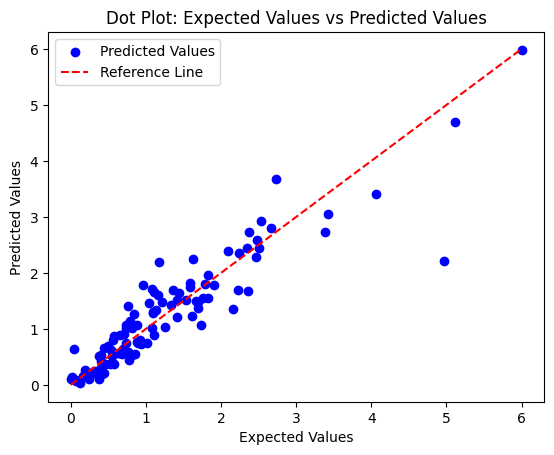

In [75]:
#Getting predictions using cross val
model = LinearRegression()
predictions = cross_val_predict(model, x, y, cv=10)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("Mean Squared Error (MSE):", round(mse, 2))
print("                      R2:", round(r2, 2))

# Create a scatterplot with expected values ​​and predicted values
plt.scatter(y, predictions, color='blue', label='Predicted Values')

# Plot a diagonal line to represent the line y = x (expected values ​​= predicted values)
x_values = np.linspace(min(y), max(y), 100)
plt.plot(x_values, x_values, color='red', linestyle='--', label='Reference Line')

# Set chart labels and title
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.title('Dot Plot: Expected Values ​​vs Predicted Values')

plt.legend()

plt.show()

**Using the entire data set to induce a Linear Regression model, identify the coefficient values ​​obtained for each attribute.**

In [77]:
# Generating the model using all data
model = LinearRegression()
model.fit(x, y)

print("Intercept: ", model.intercept_)
model.coef_

Intercept:  -0.1326054533606127


array([ 5.90225593e-04,  3.30711240e-02,  5.80051846e-02,  4.78715219e-01,
        7.10376709e-01, -1.30329221e-01])

In [78]:
fnames = df.columns

print("Coefficients of independent variables:")
for variable, coefficients in dict(zip(fnames, model.coef_)).items():
    print(f"{variable}: {coefficients}")

Coefficients of independent variables:
period: 0.000590225592924412
seeded: 0.033071124027886145
season: 0.0580051846225087
NC: 0.47871521942809175
SC: 0.7103767094223989
NWC: -0.13032922078271758


**Using the entire data set to induce a Lasso model with alpha=1, identify how many attributes had their respective coefficients reset to zero.**

In [79]:
# Generating the model using all data
model = Lasso()
model.fit(x, y)

print("Intercept: ", model.intercept_)
print("Coefficients of independent variables:")
for variable, coefficients in dict(zip(fnames, model.coef_)).items():
    print(f"{variable}: {coefficients}")

Intercept:  0.773032970855124
Coefficients of independent variables:
period: 0.002463817518745851
seeded: -0.0
season: -0.0
NC: 0.1009399492610018
SC: 0.0
NWC: 0.027228530649650674


**Divide the dataset into 80%,20% and using the same partitions compare the performance of the Linear Regression, Lasso and Ridge algorithms using the RMSE measure.**

In [65]:
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(f"{name}: {rmse(y_test, y_pred)}")

Linear Regression: 0.36531941736900997
Lasso: 0.8204491951503691
Ridge: 0.35092210954254377


**Using the Leave-one-out technique, calculate the mean absolute error (MAE) value for the Linear Regression algorithm**

In [69]:
loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(df, x)):
  x_train = df.loc[train_index,]
  y_train = df.iloc[train_index, df.columns.get_loc(y.name)]
  x_test = df.loc[test_index,]
  y_test = df.iloc[test_index, df.columns.get_loc(y.name)]

  print((i, x_train.shape, y_train.shape, x_test.index))

(0, (107, 7), (107,), Index([0], dtype='int64'))
(1, (107, 7), (107,), Index([1], dtype='int64'))
(2, (107, 7), (107,), Index([2], dtype='int64'))
(3, (107, 7), (107,), Index([3], dtype='int64'))
(4, (107, 7), (107,), Index([4], dtype='int64'))
(5, (107, 7), (107,), Index([5], dtype='int64'))
(6, (107, 7), (107,), Index([6], dtype='int64'))
(7, (107, 7), (107,), Index([7], dtype='int64'))
(8, (107, 7), (107,), Index([8], dtype='int64'))
(9, (107, 7), (107,), Index([9], dtype='int64'))
(10, (107, 7), (107,), Index([10], dtype='int64'))
(11, (107, 7), (107,), Index([11], dtype='int64'))
(12, (107, 7), (107,), Index([12], dtype='int64'))
(13, (107, 7), (107,), Index([13], dtype='int64'))
(14, (107, 7), (107,), Index([14], dtype='int64'))
(15, (107, 7), (107,), Index([15], dtype='int64'))
(16, (107, 7), (107,), Index([16], dtype='int64'))
(17, (107, 7), (107,), Index([17], dtype='int64'))
(18, (107, 7), (107,), Index([18], dtype='int64'))
(19, (107, 7), (107,), Index([19], dtype='int64'))
